In [107]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [108]:
df=pd.read_csv('e://desktop/data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# null value treatment

In [109]:
df.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [110]:
# Cabin,Embarked,Age   are the columns having null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [111]:
#only age is numeric and embarked and cabin both ae categorical columns
ar=np.array(df['Cabin'])
ar

array([nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan, 'G6',
       'C103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D56', nan,
       'A6', nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'B78', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'D33', nan, 'B30', 'C52', nan, nan, nan,
       nan, nan, 'B28', 'C83', nan, nan, nan, 'F33', nan, nan, nan, nan,
       nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'E31', nan,
       nan, nan, 'A5', 'D10 D12', nan, nan, nan, nan, 'D26', nan, nan,
       nan, nan, nan, nan, nan, 'C110', nan, nan, nan, nan, nan, nan, nan,
       'B58 B60', nan, nan, nan, nan, 'E101', 'D26', nan, nan, nan,
       'F E69', nan, nan, nan, nan, nan, nan, nan, 'D47', 'C123', nan,
       'B86', nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan,
       'C2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [112]:
#as we can see above there are many null fields
per=df['Cabin'].isnull().sum()/len(df['Cabin'])*100
per
#77 %data is null so we will drop the column
df=df.drop('Cabin', axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [113]:
print(df['Embarked'].isnull().sum())
df=df[df['Embarked'].notna()]
df

2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [114]:
#we have sucessfully deleted thoe columns
#now we have to work with age column 
print(df['Age'].isnull().sum())
per=df['Age'].isnull().sum()/len(df['Age'])*100
print(per)
#so its 19 % of whole data 
#so we cannot delete the records 
# we will replace the empty/ null fields with mean value


177
19.910011248593925


In [115]:
df['Age'].replace(np.nan, df['Age'].mean(), inplace=True)
df['Age'].isnull().any()

False

In [116]:
df_num=df.select_dtypes(['int64','float64'])
df_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.642093,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


# non graphical univariate analysis

In [119]:
df_num.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
df_num.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.074513,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.328256,0.081656,0.016824,-0.548193
Age,-0.074513,-0.328256,1.000000,-0.231908,-0.178013,0.088780
SibSp,-0.034040,0.081656,-0.231908,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.178013,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.088780,0.160887,0.217532,1.000000


# graphical univariate analysis

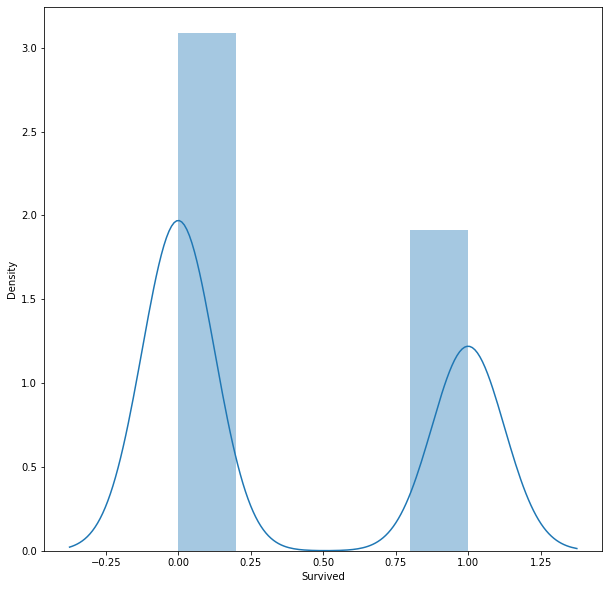

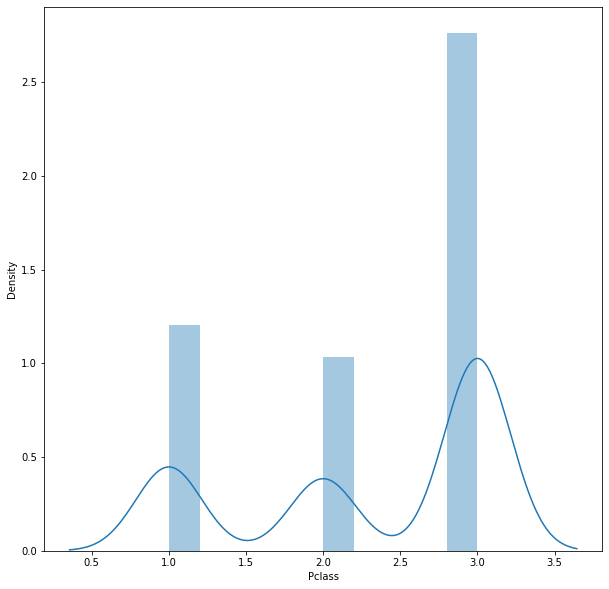

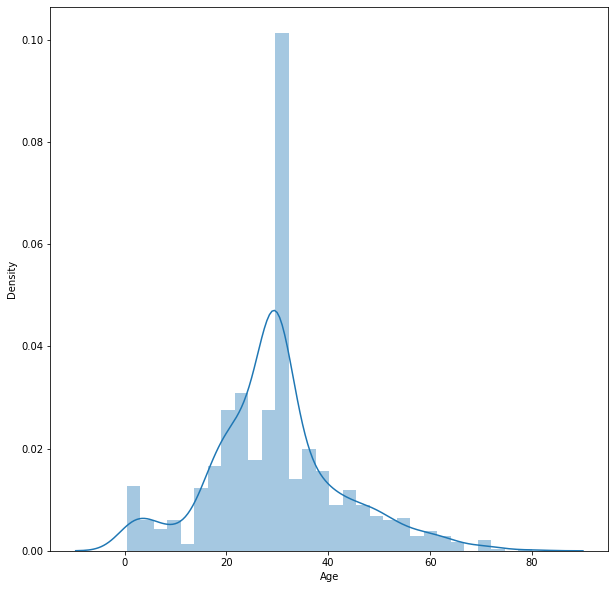

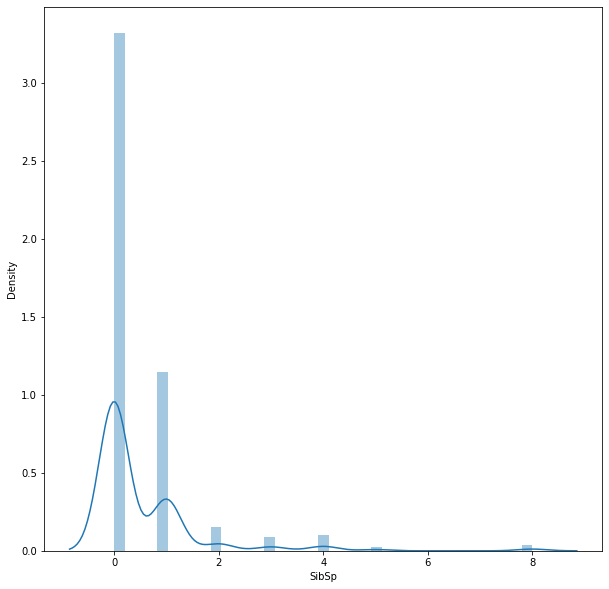

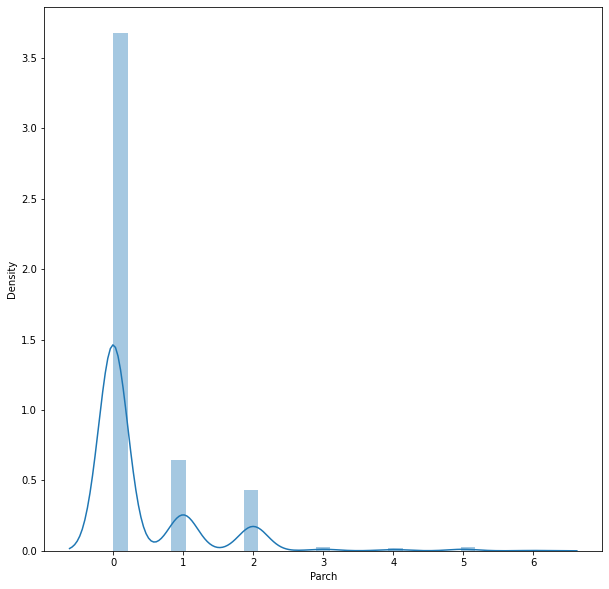

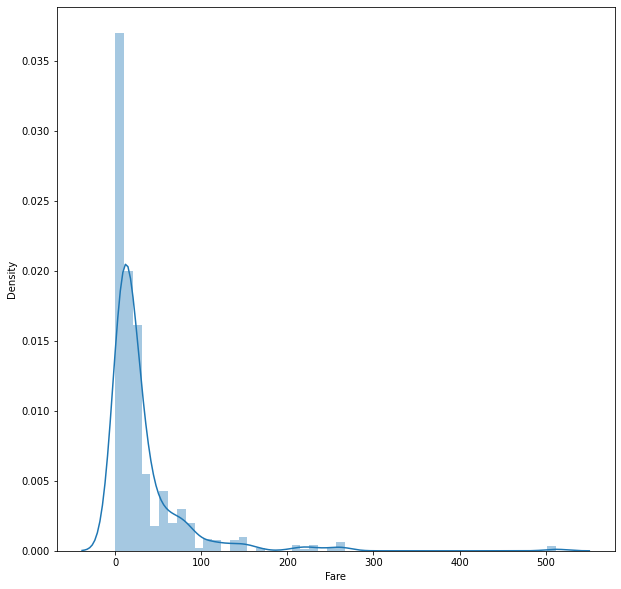

In [117]:
df_num=df_num.drop('PassengerId', axis=1)

for i in df_num:
    plt.figure(figsize=(10,10))
    plt.xlabel(i)
    sns.distplot(x=df[i])
    plt.show()

# graphical bivariate analysis 

<Figure size 360x360 with 0 Axes>

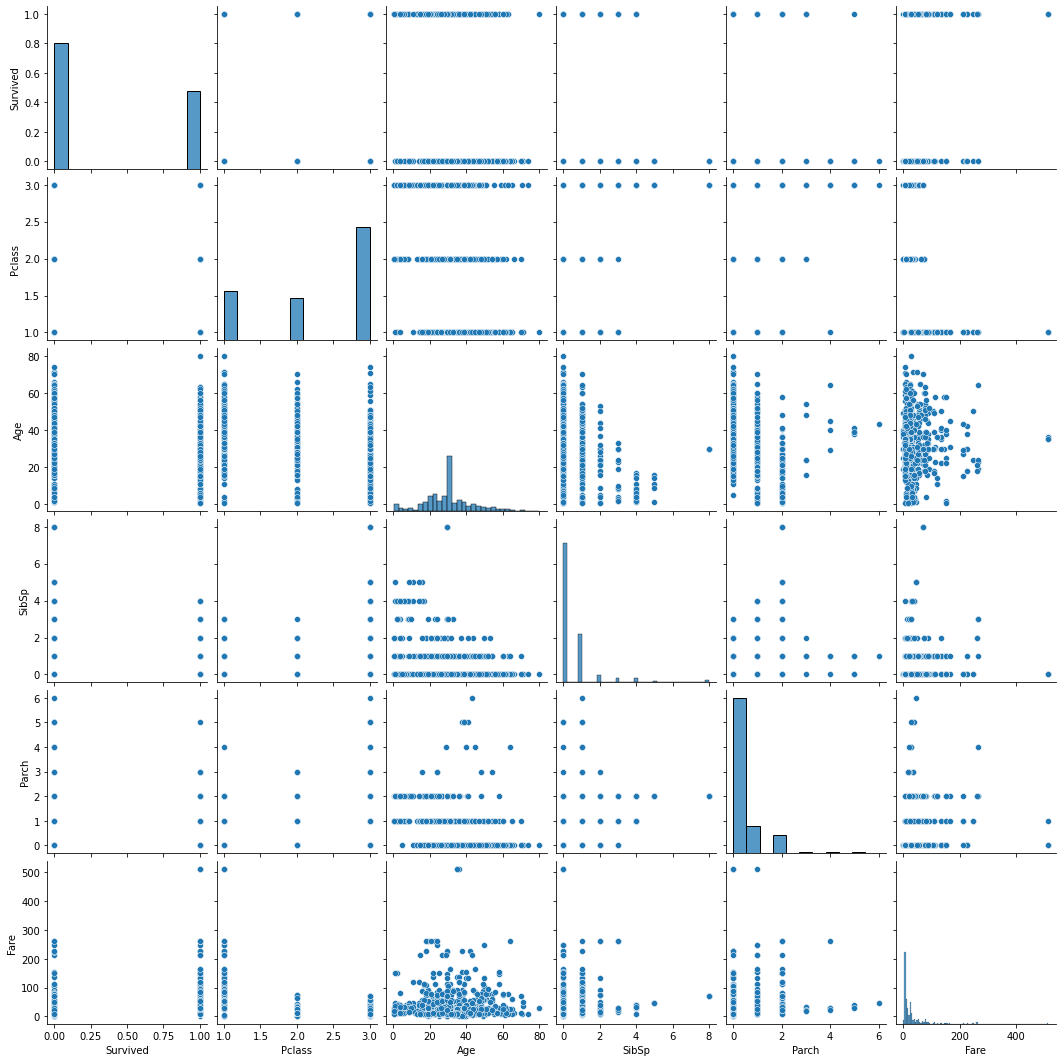

In [127]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df_num)
plt.show()

# univariate categorical data analysis

In [130]:
#we have three categorical data columns i.e. sex, embarked,name
df['Sex'].value_counts()


male      577
female    312
Name: Sex, dtype: int64

In [132]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

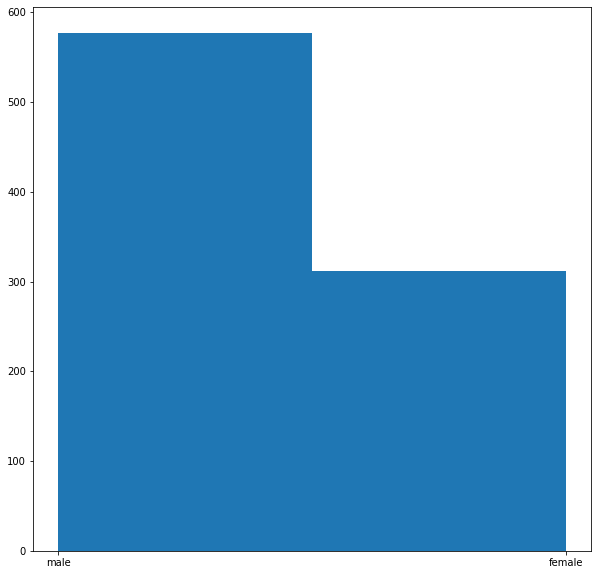

In [139]:
#univariate graphical analysis of these columns
plt.figure(figsize=(10,10))
plt.hist(x=df['Sex'], bins=2)
plt.show()

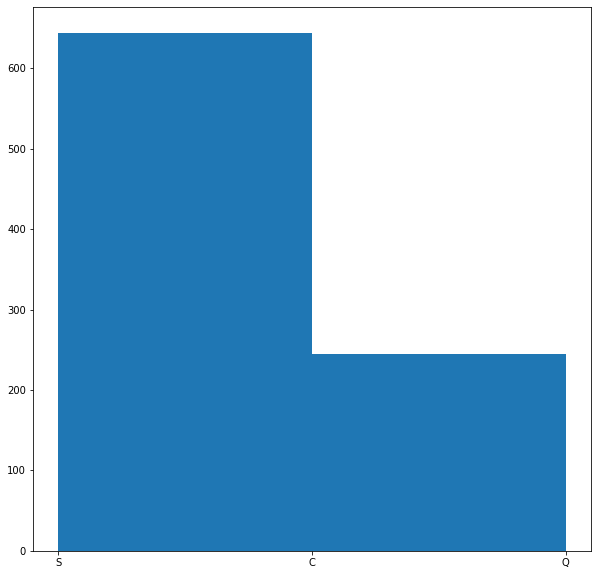

In [141]:
plt.figure(figsize=(10,10))
plt.hist(x=df['Embarked'], bins=2)
plt.show()

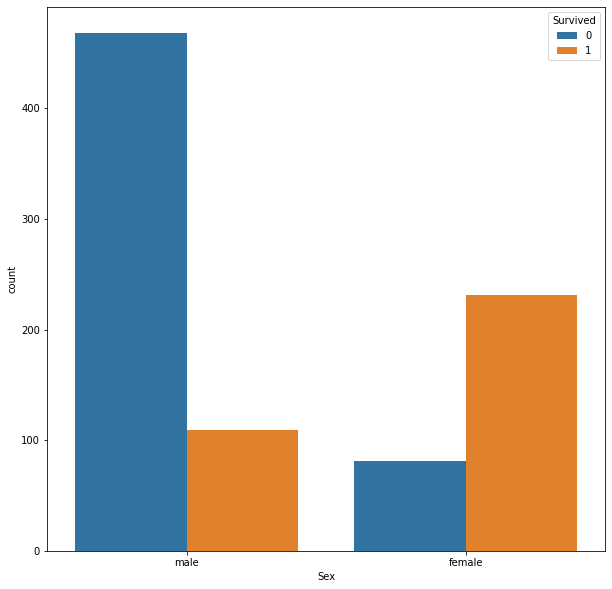

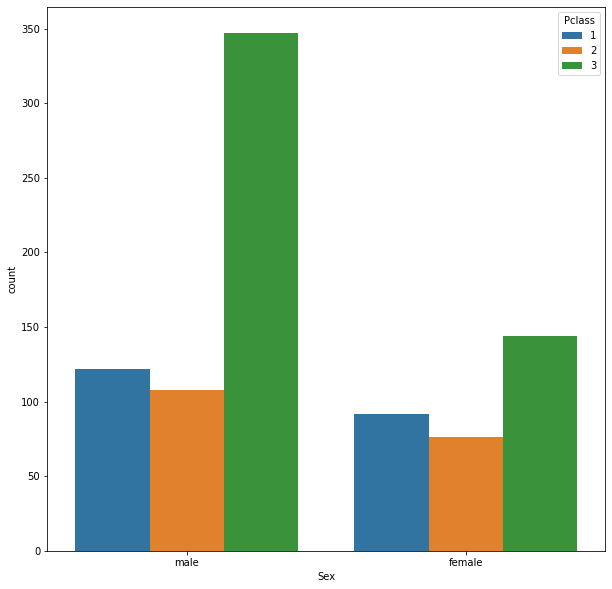

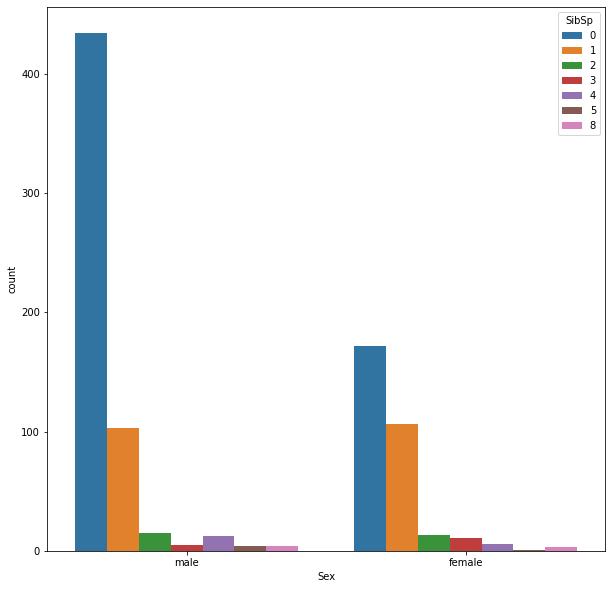

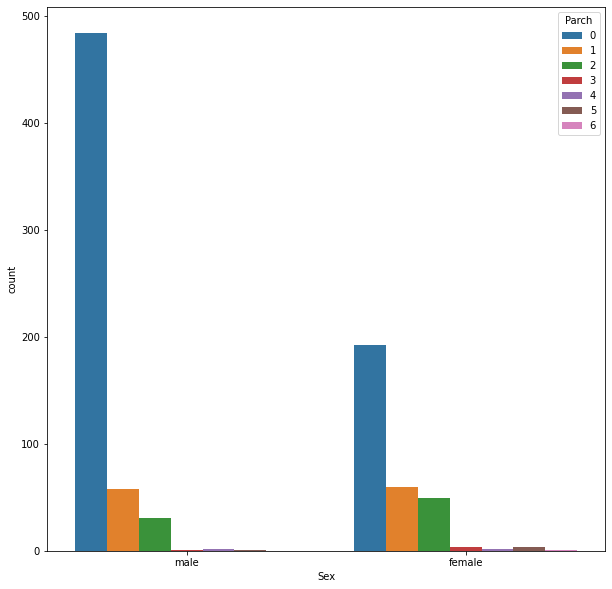

In [145]:
#bivariate graphical analysis analysis 
df_ds=df_num.select_dtypes('int64')
for i in df_ds:
    plt.figure(figsize=(10,10))
    sns.countplot(x=df['Sex'], hue=df_ds[i])
    plt.show()

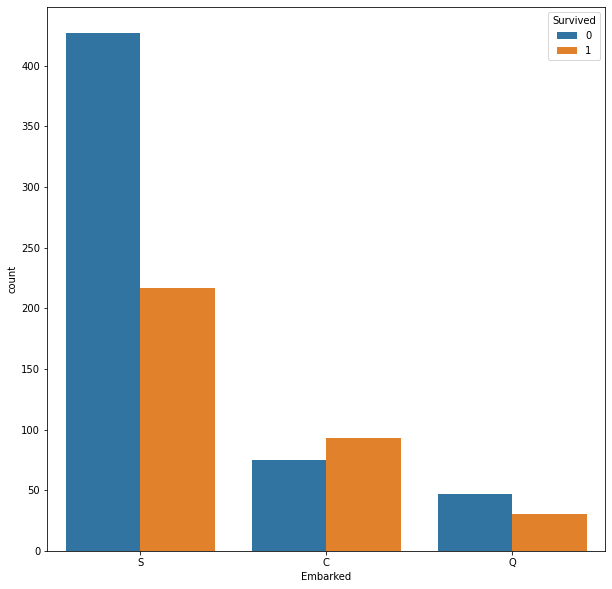

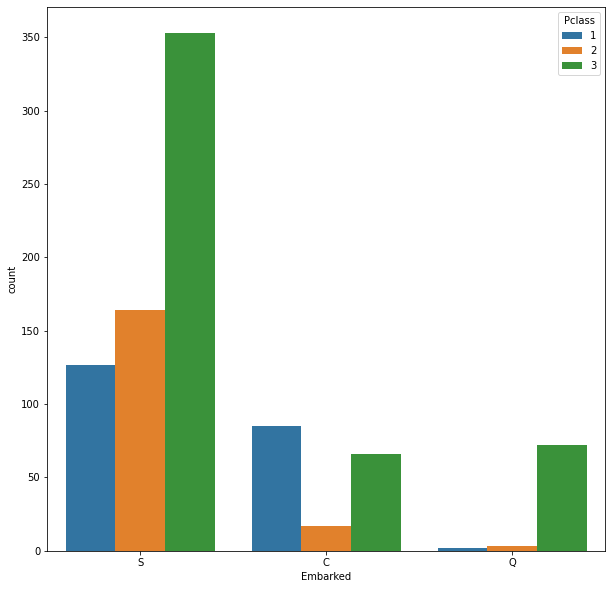

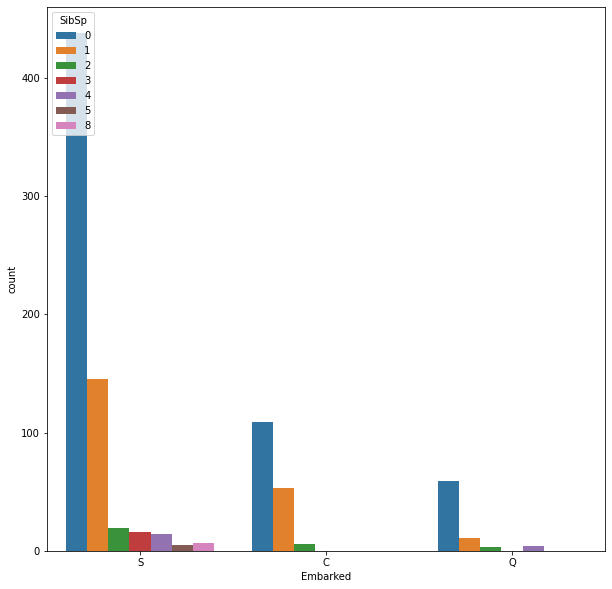

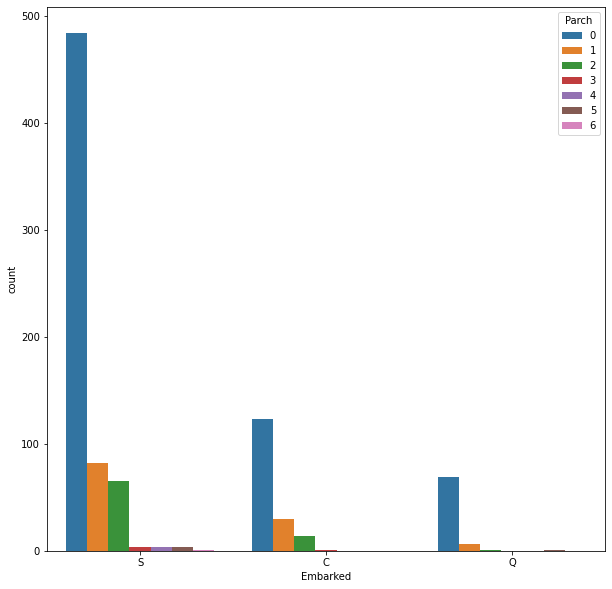

In [147]:
for i in df_ds:
    plt.figure(figsize=(10,10))
    sns.countplot(x=df['Embarked'], hue=df_ds[i])
    plt.show()

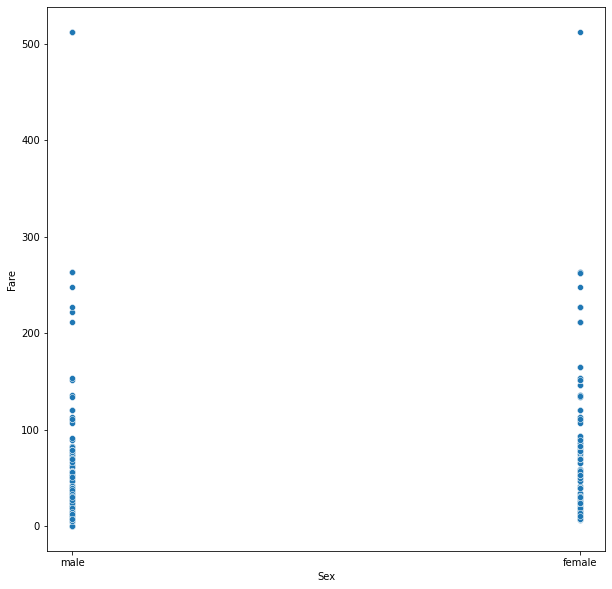

In [159]:
#lef with graphical analysis of continuous columns vs categorical column
#those continuous type columns are 
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['Sex'], y=df['Fare'])
plt.show()

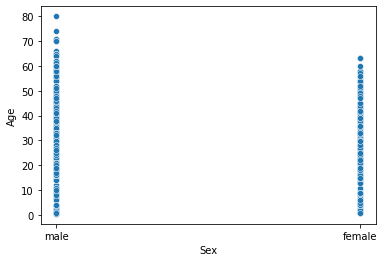

In [160]:
plt.figure()
sns.scatterplot(x=df['Sex'], y=df['Age'])
plt.show()

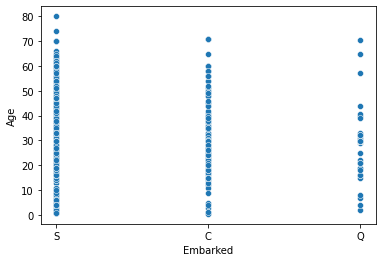

In [162]:
plt.figure()
sns.scatterplot(x=df['Embarked'], y=df['Age'])
plt.show()

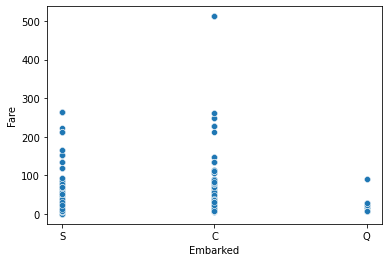

In [164]:
plt.figure()
sns.scatterplot(x=df['Embarked'], y=df['Fare'])
plt.show()

In [166]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


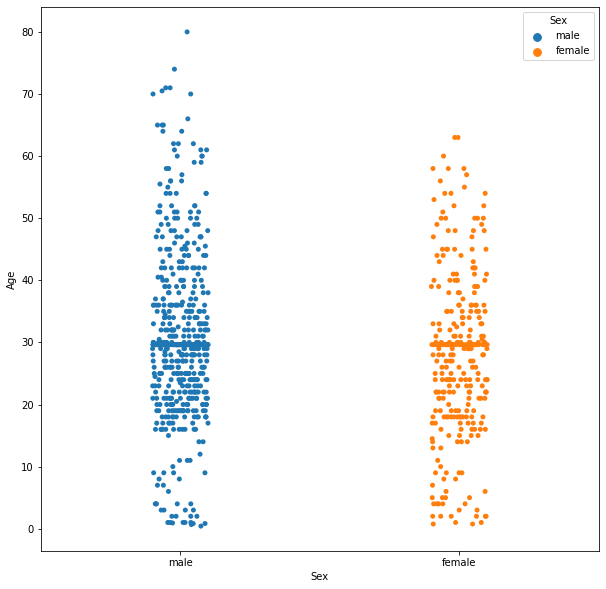

In [191]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df['Sex'],y=df['Age'],hue=df['Sex'])
plt.show()

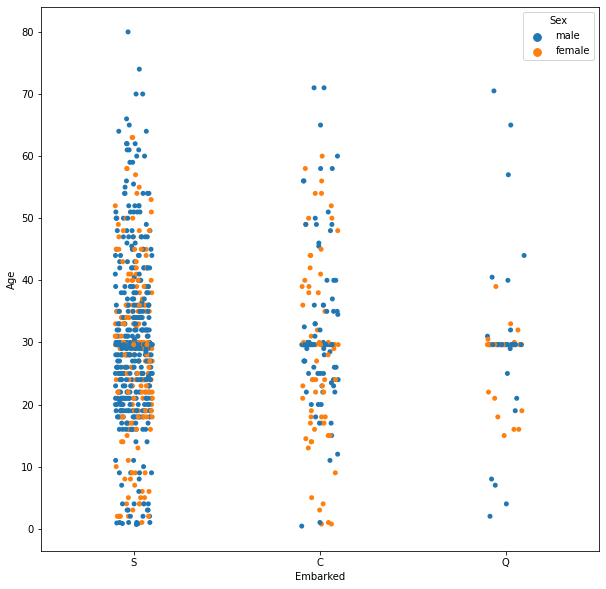

In [194]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df['Embarked'],y=df['Age'],hue=df['Sex'])
plt.show()

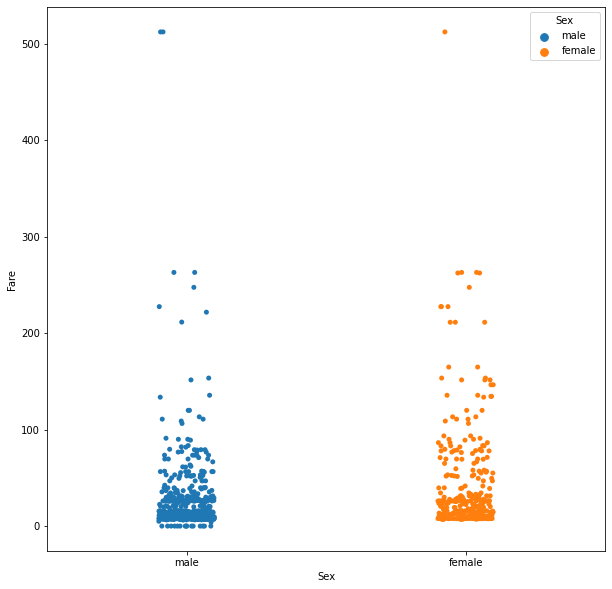

In [196]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df['Sex'],y=df['Fare'],hue=df['Sex'])
plt.show()

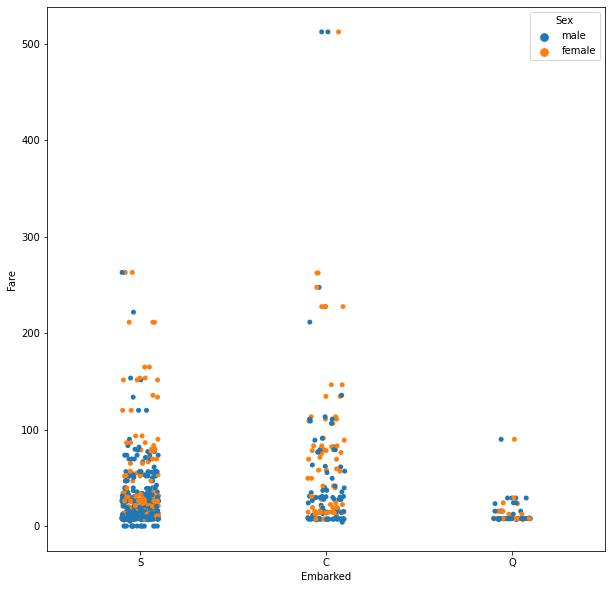

In [199]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df['Embarked'],y=df['Fare'],hue=df['Sex'])
plt.show()

# data exploration

question 1. How Survival is correlated to other attributes of the dataset ? Findout Pearson’s r.

In [201]:
print('Pearson’s r.')
df.corr()

Pearson’s r.


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030335,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074513,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.328256,0.081656,0.016824,-0.548193
Age,0.030335,-0.074513,-0.328256,1.000000,-0.231908,-0.178013,0.088780
SibSp,-0.057686,-0.034040,0.081656,-0.231908,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178013,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088780,0.160887,0.217532,1.000000


from above table we can conclude that survaival is inversely proportional to class.
fare and class are also inversely proportional(for 1 st class, more fare was charged than 2 nd clas and for 2 nd class more fare was charged than 3 rd class)
therefore, survival is directly proportional to fare

question 2. Did Sex play a role in Survival ?

In [210]:
data_sex=pd.get_dummies(df['Sex'])
newdataframe=pd.concat([df.drop(['Sex'],axis=1),data_sex],axis=1)
newdataframe
newdataframe.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
PassengerId,1.000000,-0.005028,-0.035330,0.030335,-0.057686,-0.001657,0.012703,-0.043136,0.043136
Survived,-0.005028,1.000000,-0.335549,-0.074513,-0.034040,0.083151,0.255290,0.541585,-0.541585
Pclass,-0.035330,-0.335549,1.000000,-0.328256,0.081656,0.016824,-0.548193,-0.127741,0.127741
Age,0.030335,-0.074513,-0.328256,1.000000,-0.231908,-0.178013,0.088780,-0.089339,0.089339
SibSp,-0.057686,-0.034040,0.081656,-0.231908,1.000000,0.414542,0.160887,0.116348,-0.116348
Parch,-0.001657,0.083151,0.016824,-0.178013,0.414542,1.000000,0.217532,0.247508,-0.247508
Fare,0.012703,0.255290,-0.548193,0.088780,0.160887,0.217532,1.000000,0.179958,-0.179958
female,-0.043136,0.541585,-0.127741,-0.089339,0.116348,0.247508,0.179958,1.000000,-1.000000
male,0.043136,-0.541585,0.127741,0.089339,-0.116348,-0.247508,-0.179958,-1.000000,1.000000


In [211]:
newdataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  female       889 non-null    uint8  
 11  male         889 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(2)
memory usage: 110.4+ KB


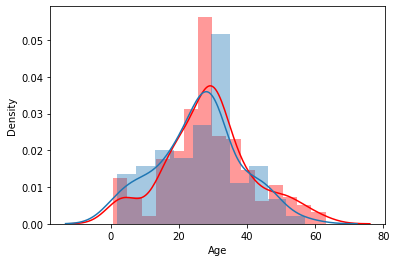

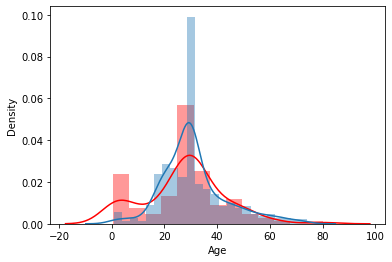

In [247]:
femalesframe=newdataframe[newdataframe['female']==1]
mensframe=newdataframe[newdataframe['male']==1]

x=sns.distplot(femalesframe[femalesframe['Survived']==1]['Age'],color='red')
y=sns.distplot(femalesframe[femalesframe['Survived']==0]['Age'])
plt.show()
x=sns.distplot(mensframe[mensframe['Survived']==1]['Age'],color='red')
y=sns.distplot(mensframe[mensframe['Survived']==0]['Age'])
plt.show()

from above we can see that men's probability is more in age group 20-40 
in female's there is high probability in perticular age group but lesser than mens
therefore we can conclude probability of survival is corelated with sex and age 

question 3. Did class played role in survival ?

yes ofcourse, from corelation table we can clearly see that survival is highly corelated with class.
number of survivers from class 1 is more than that of class 2 and class 3 


question 4.How fare is related to Age, Class and Port of Embarkation ?

corelation of age and fare is 0.08  that means Fare and age are not related
corelation of Fare and class is -0.54 that means Fare and class is inversely proportional


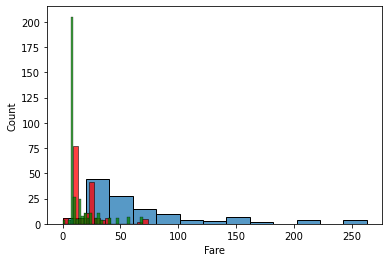

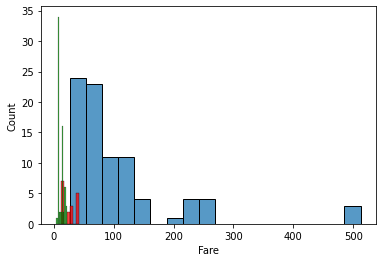

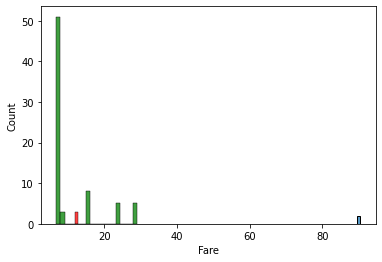

In [286]:
s_frame=df[df['Embarked']=='S']
c_frame=df[df['Embarked']=='C']
q_frame=df[df['Embarked']=='Q']

ax=sns.histplot(s_frame[s_frame['Pclass']==1]['Fare'])
ax=sns.histplot(s_frame[s_frame['Pclass']==2]['Fare'],color='red')
ax=sns.histplot(s_frame[s_frame['Pclass']==3]['Fare'],color='green')
plt.show()
bx=sns.histplot(c_frame[c_frame['Pclass']==1]['Fare'])
bx=sns.histplot(c_frame[c_frame['Pclass']==2]['Fare'],color='red')
bx=sns.histplot(c_frame[c_frame['Pclass']==3]['Fare'],color='green')
plt.show()
cx=sns.histplot(q_frame[q_frame['Pclass']==1]['Fare'])
cx=sns.histplot(q_frame[q_frame['Pclass']==2]['Fare'],color='red')
cx=sns.histplot(q_frame[q_frame['Pclass']==3]['Fare'],color='green')


by observing above graphs we can clearly see that 
blue bars indicate class 1
red bar indicates class 2
and green bars indicate class 3

if we will compare the price range of all in above three graphs
we can raech to conclusion that fare of embarked label C of any class is comparatively more  than that of any other label
so label C of embarked column charge more fare than label S
and label S of embarked column charge more fare than label Q

